# SIS with multiple risk classes
This is the Python version of program 3.2 from page 64 of "Modeling Infectious Disease in humans and animals" by Keeling & Rohani.
This is based on code written by Ilias Soumpasis.

In [2]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Parameters (rates here are specified in terms of days)


waifw=np.array([0.0, 3.0, 10.0, 60.0, 100.0])
beta=0.0016*np.outer(waifw,waifw) #transmission matrix
gamma=0.2*np.array([1.0, 1.0, 1.0, 1.0, 1.0]) #recovery rates
n=np.array([0.06, 0.31, 0.52, 0.08, 0.03]) #fraction of population in each group
I=np.array([0.0, 0.0, 0.0, 0.0, 1e-5]) #initial infecteds in each group

ND=30 #number of days
TS=1.0 #time step

m=5 #number of subpopulations

INPUT=I #initial conditions

In [4]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((m))
	V = INP    
	for i in range(m):
		Y[i] = np.multiply(np.dot(beta[i], V), (n[i]-V[i]))-gamma[i]*V[i]
	return Y   # For odeint

In [5]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

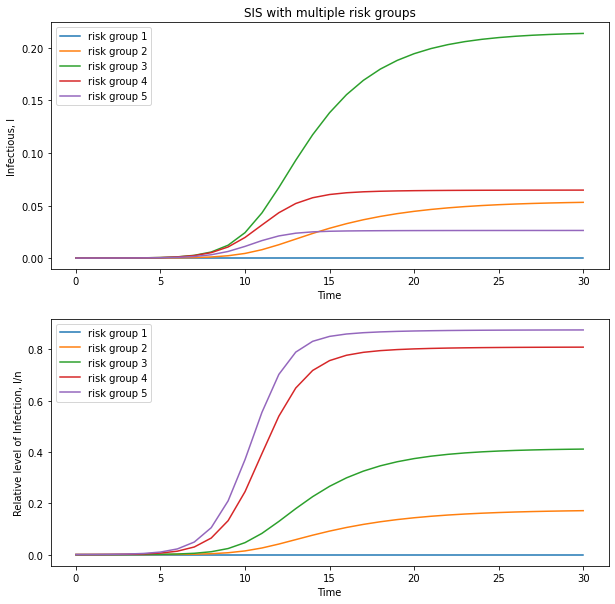

In [8]:
#plotting
fig=plt.figure(figsize=(10,10))
plt.title('SIS with multiple risk groups')
plt.axis('off')
fig.add_subplot(211)
for i in range(m):
	plt.plot(RES[:,i], label = 'risk group %s' %(i+1))
plt.ylabel('Infectious, I')
plt.xlabel('Time')
plt.legend(loc=0)

fig.add_subplot(212)
for i in range(m):
	plt.plot(RES[:,i]/n[i], label = 'risk group %s' %(i+1))
plt.ylabel('Relative level of Infection, I/n')
plt.xlabel('Time')
plt.legend(loc=0)


plt.show()
fig.savefig('SIS_multiple_risk_classes.pdf')